### Install necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install saspy
import saspy

### Data from CDC Behavioral Risk Factor Surveillance System

The 2017 BRFSS data continues to reflect the changes initially made in 2011 in weighting methodology (raking) and the addition of cell phone only respondents. The aggregate BRFSS combined landline and cell phone dataset is built from the landline and cell phone data submitted for 2017 and includes data for 50 states, the District of Columbia, Guam, and Puerto Rico.

There are 450,016 records for 2017. 

The website is: https://www.cdc.gov/brfss/annual_data/annual_2017.html

Codebook for all variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

Codebook for calculated variables is here: https://www.cdc.gov/brfss/annual_data/2017/pdf/codebook17_llcp-v2-508.pdf

In [3]:
data = pd.read_sas(r'C:\Users\Nick\Desktop\GitProjects\LLCP2017XPT\LLCP2017.xpt', format='xport')
data.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000001',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,b'01122017',b'01',b'12',b'2017',1100.0,b'2017000002',2.017000e+09,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,b'01102017',b'01',b'10',b'2017',1100.0,b'2017000003',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,1.0,1.0,2.0
3,1.0,1.0,b'02082017',b'02',b'08',b'2017',1200.0,b'2017000004',2.017000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
4,1.0,1.0,b'01302017',b'01',b'30',b'2017',1100.0,b'2017000005',2.017000e+09,1.0,...,3.0,2.0,2.0,4.0,2.0,1.0,2.0,2.0,2.0,2.0


In [4]:
data.shape

(450016, 358)

### Variables and coding info

**_State**
(US state: 1-72; MA=#25)

**_PRACE1** 
(race: 1=White, 2= Black, 3=Native American/Alaskan, 4=Asian, 5=Native Hawaiian/Pacific Islander, 6=other, 7=no preferred race, 8=multi-racial, but chose not to select other race, 77=don't know, 99=refused)

**_HISPANC** 
(1=Hispanic/Latino, 2=not Hispanic/Latino, 9=noanswer/refused/missing)

**_AGE_G**  
(1=18-24, 2=25-34, 3=35-44, 4=45-54, 5=55-64, 6=65+) 

**_BMI5CAT**  
(BMI: 1= underweight, 2=normal weight, 3=overweight, 4=obese, .=don't know/refused)

**_CHLDCNT** 
(#children in household: 1=none,2=1, 3=2, 4=3, 5=4, 6=5+, 9=don't know/refused/missing )

**_EDUCAG** 
(edu: 1=<HS, 2=HS, 3=Attended College/Tech school, 4=Graduated College/Tech, 9=don't know/missing/refused)

**_INCOMG** 
(income: 1=<15k, 2=15-25k, 3=25-35k, 4=35-50k, 5=50k+, 9=don't know/missing/refused)

**_DRNKWEK** 
(# etoh/week: 0=no drinks, 1-999+=number of drinks per week, 99900=don't know/refused/missing)

**_RFDRHV5** 
(heavy etoh 1=no, 2=yes, 9=don't know/missing/refused)

**_PACAT1**  
(phys act levl: 1=highly active, 2=active, 3=insufficiently active, 4=inactive, 9=don't know/refused/missing)

**_RFHLTH**  
(health status: 1=good or better, 2=fair or poor, 9=don't know/missing, refused)

**_HCVU651**  
(healhcare access: 1=have, 2=don't have, 9=don't know, missing, refused)

**_MENT14D** 
(days over month with mental health problems: 1=none/good MH, 2=1-13 days not good, 3=14+ days not good, 9=don't know/missing/refused)

### Create subset with only the variables/columns from above

In [5]:
LLCP=data[['_STATE','_PRACE1', '_HISPANC', '_AGE_G', '_BMI5CAT', '_CHLDCNT', '_EDUCAG', '_INCOMG', '_DRNKWEK', 
          '_RFDRHV5', '_PACAT1', '_RFHLTH', '_HCVU651', '_MENT14D']]
LLCP.head(20)

,_STATE,_PRACE1,_HISPANC,_AGE_G,_BMI5CAT,_CHLDCNT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,_MENT14D
0,1.0,1.0,2.0,6.0,3.0,1.0,4.0,4.0,5.397605e-79,1.0,1.0,1.0,9.0,1.0
1,1.0,1.0,2.0,6.0,3.0,1.0,4.0,5.0,5.397605e-79,1.0,1.0,1.0,9.0,1.0
2,1.0,1.0,2.0,6.0,3.0,1.0,1.0,9.0,1.000000e+02,1.0,4.0,1.0,9.0,1.0
3,1.0,1.0,2.0,6.0,3.0,1.0,1.0,1.0,5.397605e-79,1.0,9.0,2.0,9.0,1.0
4,1.0,1.0,2.0,6.0,2.0,1.0,1.0,1.0,5.397605e-79,1.0,4.0,2.0,9.0,1.0
5,1.0,1.0,2.0,6.0,3.0,1.0,2.0,2.0,6.000000e+02,1.0,3.0,1.0,9.0,1.0
6,1.0,1.0,2.0,6.0,3.0,1.0,3.0,5.0,5.397605e-79,1.0,4.0,1.0,9.0,1.0
7,1.0,1.0,2.0,6.0,NaN,1.0,2.0,9.0,5.397605e-79,1.0,2.0,1.0,9.0,1.0
8,1.0,1.0,2.0,6.0,2.0,1.0,2.0,3.0,5.397605e-79,1.0,4.0,1.0,9.0,3.0
9,1.0,1.0,2.0,4.0,3.0,2.0,2.0,4.0,6.000000e+02,1.0,1.0,1.0,1.0,2.0


### Descriptive Stats

In [6]:
LLCP.shape

(450016, 14)

In [7]:
LLCP.describe()

,_STATE,_PRACE1,_HISPANC,_AGE_G,_BMI5CAT,_CHLDCNT,_EDUCAG,_INCOMG,_DRNKWEK,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,_MENT14D
count,450016.000000,450011.000000,450016.000000,450016.000000,413570.000000,450016.000000,450016.000000,450016.000000,4.500160e+05,450016.000000,450016.000000,450016.000000,450016.000000,450016.000000
mean,28.816780,3.588079,1.987558,4.416081,2.965991,1.566020,2.979292,4.624678,6.939471e+03,1.590866,3.223821,1.212708,3.986392,1.555714
std,15.813072,14.036208,0.756237,1.583006,0.829725,1.198984,1.035973,2.361981,2.488882e+04,1.999338,2.401394,0.557176,3.802843,1.168103
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000
25%,17.000000,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000
50%,27.000000,1.000000,2.000000,5.000000,3.000000,1.000000,3.000000,5.000000,2.300000e+01,1.000000,3.000000,1.000000,1.000000,1.000000
75%,41.000000,1.000000,2.000000,6.000000,4.000000,2.000000,4.000000,5.000000,4.000000e+02,1.000000,4.000000,1.000000,9.000000,2.000000
max,72.000000,99.000000,9.000000,6.000000,4.000000,9.000000,9.000000,9.000000,9.990000e+04,9.000000,9.000000,9.000000,9.000000,9.000000


### Basic Visualizations

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

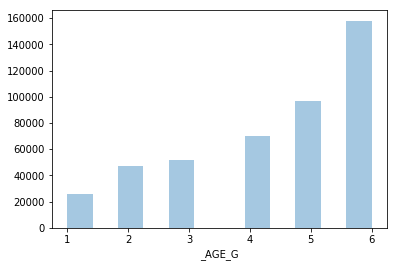

In [9]:
sns.distplot(LLCP['_AGE_G'], kde=False, bins=12);

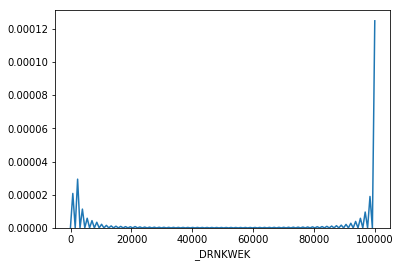

In [11]:
sns.distplot(LLCP['_DRNKWEK'],hist=False, bins=10);

### You can see that the "missing/refused/don't know" value of "99900" is making the plot unreadable, so we'll have to drop these extreme values